In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv("Books.csv",encoding="latin-1", error_bad_lines=False)
users = pd.read_csv("Users.csv",encoding="latin-1", error_bad_lines=False)
ratings = pd.read_csv("Ratings.csv",encoding="latin-1", error_bad_lines=False)

### Books data

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
print("No. of observations:{}\nNo. of parameters:{}".format(books.shape[0],books.shape[1]))

No. of observations:271360
No. of parameters:8


In [6]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [8]:
books.duplicated().sum()

0

In [9]:
books.rename(columns={'Book-Title':'title'},inplace=True)
books.rename(columns={'Book-Author':'author'},inplace=True)
books.rename(columns={'Year-Of-Publication':'year'},inplace=True)
books.rename(columns={'Publisher':'publisher'},inplace=True)

In [10]:
books['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
#since year data has some object it it, we shall convert it into null data
books['year'] = pd.to_numeric(books['year'],errors='coerce')
books['year'].isna().sum()

3

In [12]:
#since year data has the year 0 and 2022 which is invalid, we shall convert it into null data
books.loc[(books['year'] > 2022) | (books['year'] == 0), 'year'] = np.NAN
#Replacing null data with median 
books['year'].fillna(books['year'].median() , inplace = True)
books['year'].isna().sum()

0

In [13]:
#Finding and replacing null data from publisher
books.loc[books['publisher'].isna()]

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [14]:
#Replacing null data from publisher
books['publisher'].fillna('other' , inplace = True)
books['publisher'].isna().sum()

0

In [15]:
#Finding and replacing null data from author
books.loc[books['author'].isna()]

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [16]:
#replacing null data from publisher
books['author'].fillna("Unknown" , inplace = True)
books['author'].isna().sum()

0

In [17]:
books['ISBN'] = books['ISBN'].str.upper()

In [18]:
books.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### User data

In [19]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [21]:
users.rename(columns={'Location':'location'},inplace=True)
users.rename(columns={'Age':'age'},inplace=True)

<AxesSubplot:xlabel='age'>

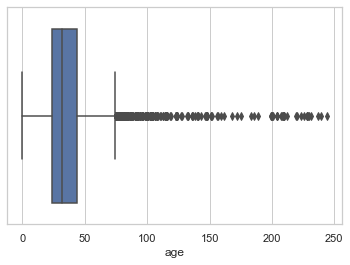

In [22]:
sns.set(style="whitegrid")
sns.boxplot(x='age',data=users)

In [23]:
print(sorted(users['age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [24]:
#removing age above 100 and below 5 
users.loc[(users['age'] > 100) | (users['age'] < 5) , 'age' ] = np.NAN

In [25]:
users['age'].isna().sum()

112010

In [26]:
#Filling the null values with mean
users['age'].fillna(users['age'].mean(), inplace = True)

In [27]:
users.duplicated().sum()

0

### Rating data

In [28]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
ratings.shape

(1149780, 3)

In [30]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [31]:
ratings.duplicated().sum()

0

In [32]:
ratings.rename(columns={'Book-Rating' : 'rating'} , inplace=True)

In [33]:
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [34]:
ratings.loc[ratings['rating'] == 0]

,User-ID,ISBN,rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


In [35]:
ratings.shape

(1149780, 3)

<AxesSubplot:>

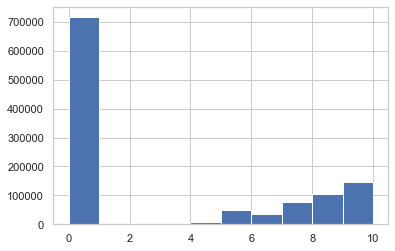

In [36]:
ratings.rating.hist(bins=10)

In [37]:
k = ratings['User-ID'].value_counts()

In [38]:
k

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
271728        1
245123        1
234886        1
259466        1
187812        1
Name: User-ID, Length: 105283, dtype: int64

In [39]:
k.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: User-ID, dtype: float64

In [40]:
user_count = pd.DataFrame(ratings.groupby('User-ID')['rating'].count())
user_count.shape

(105283, 1)

In [41]:
user_count

,rating
User-ID,
2,1
7,1
8,18
9,3
10,2
...,...
278846,2
278849,4
278851,23


In [42]:
user_count.head()
user_count['rating'].max()

13602

In [43]:
print(sorted(user_count['rating'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 22

In [44]:
user_count[user_count['rating']>500]

,rating
User-ID,
3363,901
3757,605
6251,892
6575,814
7346,1007
...,...
274004,528
274061,1038
274308,1493


In [45]:
k1 = user_count[(user_count['rating']>1) & (user_count['rating']<=100)].rating.count()
k2 = user_count[(user_count['rating']>100) & (user_count['rating']<=200)].rating.count()
k3 = user_count[(user_count['rating']>200) & (user_count['rating']<500)].rating.count()
k4 = user_count[(user_count['rating']>500)].rating.count()

In [46]:
print(k1 , k2, k3, k4)

44292 926 612 287


<BarContainer object of 4 artists>

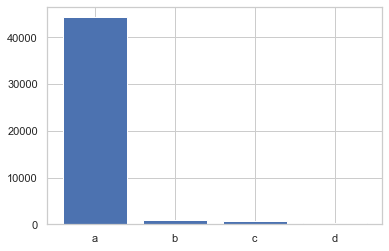

In [47]:
x = np.array([k1 , k2, k3, k4])
y = np.array(['a' , 'b' , 'c' , 'd'])
plt.bar(y,x)

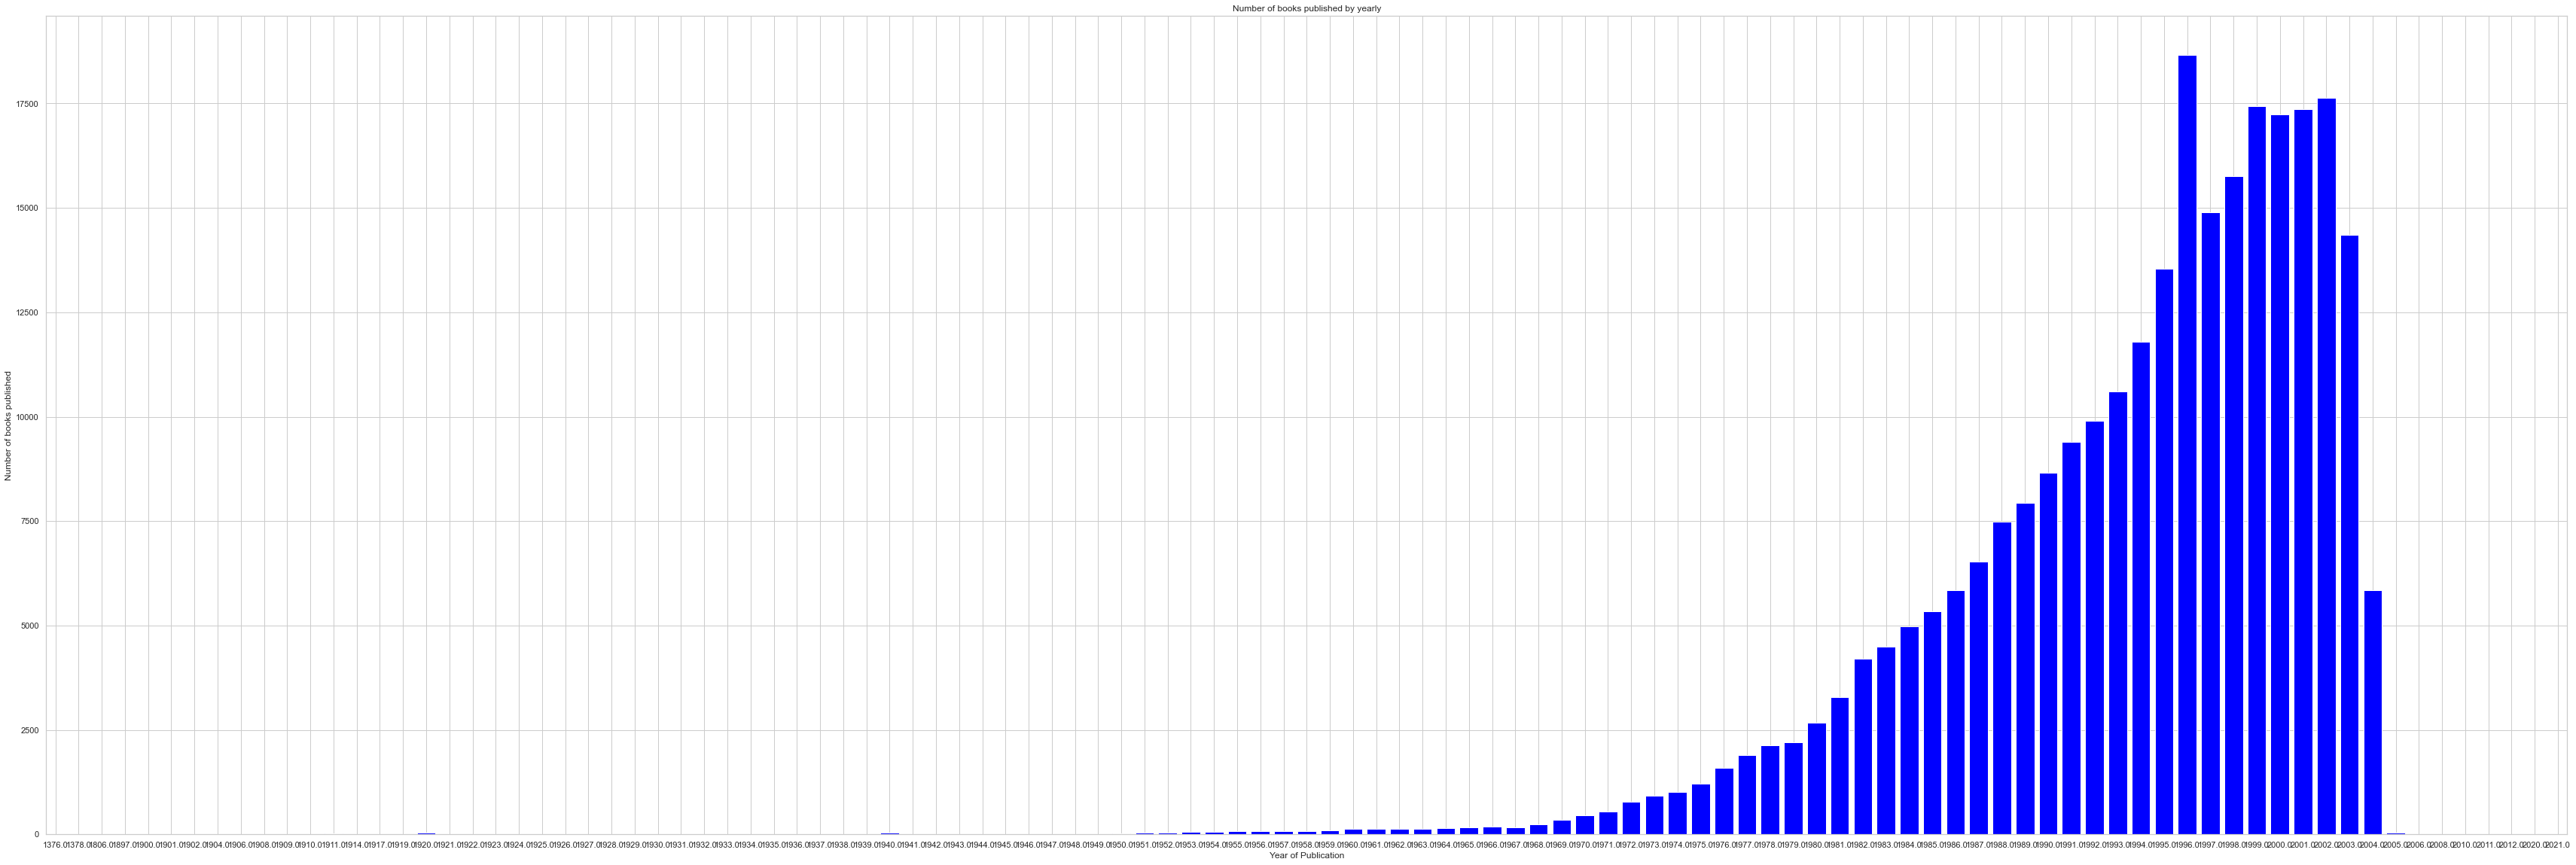

In [48]:
publications = {}
for year in books['year']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(60, 20))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published by yearly")
plt.margins(x = 0)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

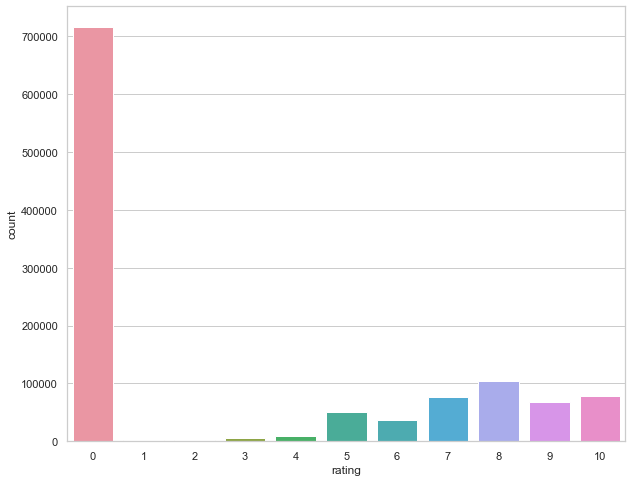

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating", data=ratings)

Text(0.5, 1.0, 'Explicit Ratings')

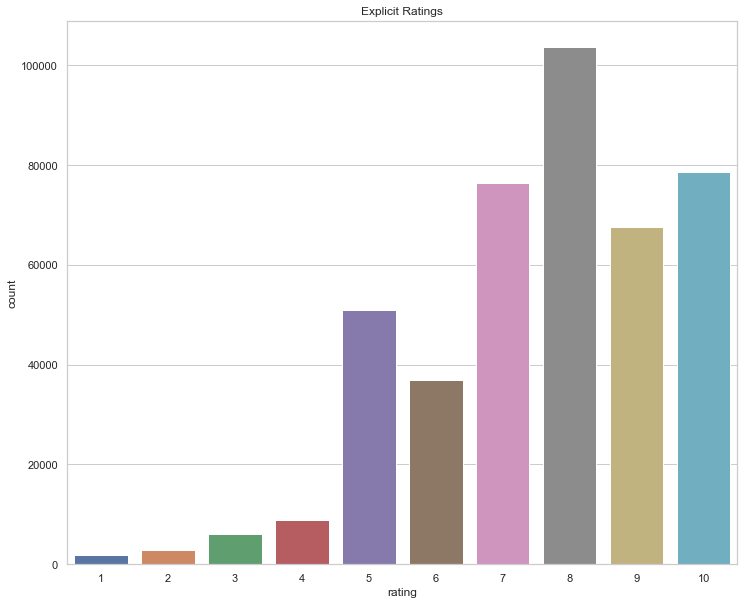

In [51]:
# Explicit Ratings
plt.figure(figsize=(12,10))
data = ratings[ratings['rating'] != 0]
sns.countplot(x="rating", data=data)
plt.title("Explicit Ratings")

Text(0.5, 1.0, 'Number of books by an author (Top 20)')

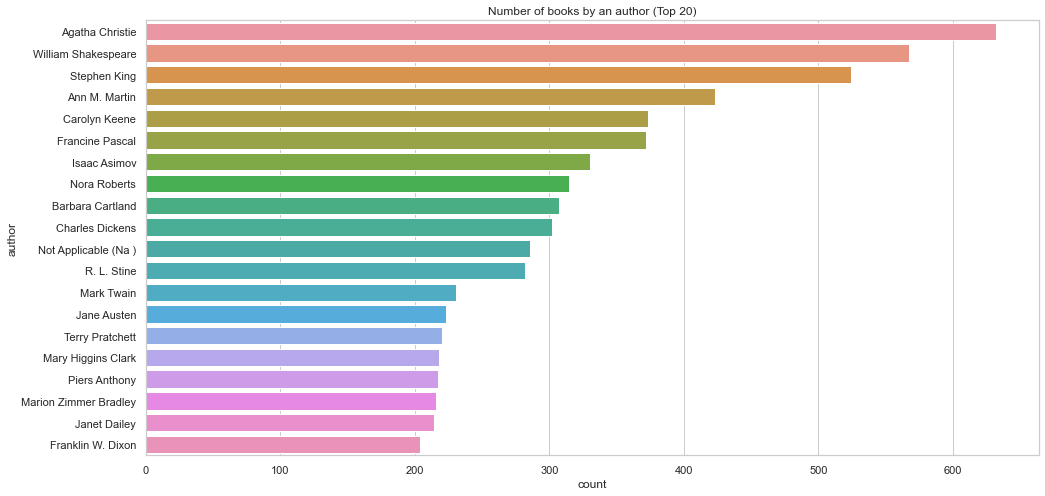

In [53]:
#number of books published by an author (top-20)
plt.figure(figsize=(16,8))
sns.countplot(y="author", data=books,order=books['author'].value_counts().index[0:20])
plt.title("Number of books by an author (Top 20)")

Text(0.5, 1.0, 'Number of books published by a publisher (Top 20)')

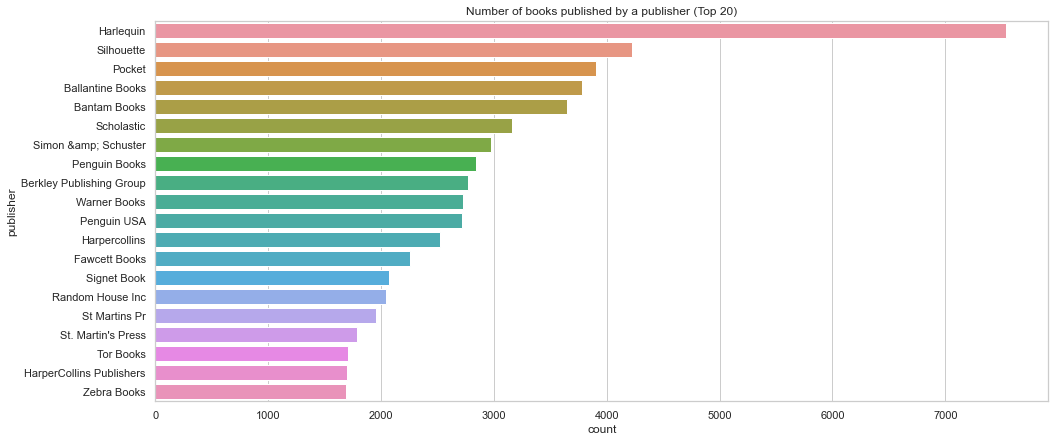

In [54]:
# number of books published by publisher (top 20)
plt.figure(figsize=(16,7))
sns.countplot(y="publisher", data=books,order=books['publisher'].value_counts().index[0:20])
plt.title("Number of books published by a publisher (Top 20)")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 10)')

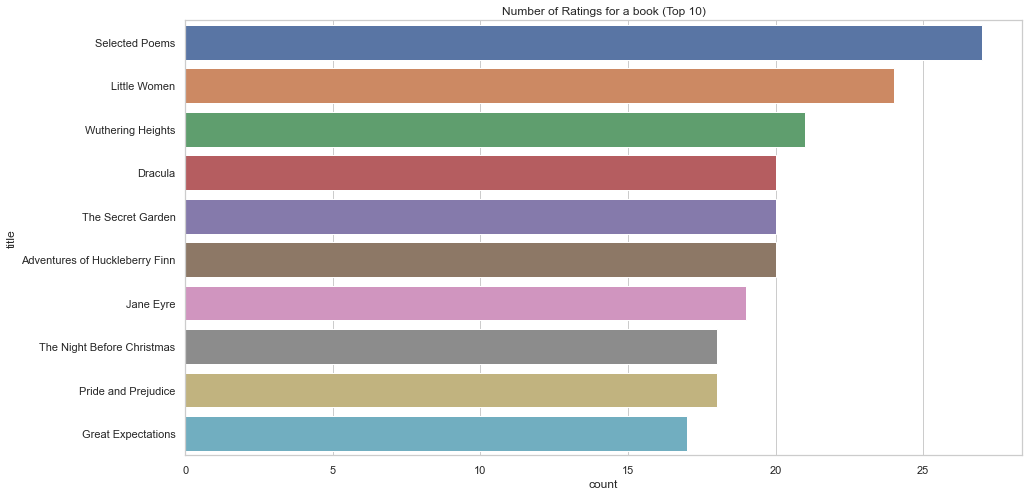

In [58]:
# Plotting of ratings 
plt.figure(figsize=(15,8))
sns.countplot(y="title", data=books, order=books['title'].value_counts().index[0:10])
plt.title("Number of Ratings for a book (Top 10)")

## Simple Popularity based Recommendation System

In [65]:
ratings_count = ratings.groupby(by=['ISBN'])['rating'].sum()
ratings_count = pd.DataFrame(ratings_count)
top10 = ratings_count.sort_values('rating' , ascending=False).head(10)
print("The following books are recommended")
top10.merge(books , left_index=True , right_on= 'ISBN')

The following books are recommended


,rating,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
2143,2815,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
77384,2815,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
26,2551,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...


## Collaborative Filtering (using KNN)

#####  removing users with less than 200 ratings 

In [66]:
counts = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts[counts >= 200].index)]


In [67]:
ratings.shape

(527556, 3)

In [68]:
ratings

,User-ID,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [69]:
print(1149780-ratings.shape[0],"Datapoints has been churned out")

622224 Datapoints has been churned out


##### merging book and rating dataframe together on isbn 

In [70]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
combine_book_rating.head()

,User-ID,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [71]:
column = ['year', 'publisher', 'author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
combine_book_rating = combine_book_rating.drop(column , axis =1)
combine_book_rating

,User-ID,ISBN,rating,title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
3,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...
494103,275970,1892145022,0,Here Is New York
494104,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...
494105,275970,3411086211,10,Die Biene.
494106,275970,3829021860,0,The Penis Book


In [75]:
rating_counts = combine_book_rating.groupby(by=['title'])['rating'].count()

In [76]:
rating_with_rating_count = combine_book_rating.merge(rating_counts,on='title',how='left')#merge on left
rating_with_rating_count.head()

,User-ID,ISBN,rating_x,title,rating_y
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,164
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,164
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,164
3,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,164
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,164


In [77]:
rating_with_rating_count.rename(columns={'rating_x':'book_rating','rating_y':'rating_count'},inplace=True)
rating_with_rating_count.head()

,User-ID,ISBN,book_rating,title,rating_count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,164
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,164
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,164
3,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,164
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,164


In [78]:
rating_with_rating_count.shape

(494108, 5)

In [79]:
rating_with_rating_count.drop_duplicates(['User-ID','title'],inplace=True)

##### Creating a pivot Table so as to calculate Similarity scores between different Users

In [80]:
pt=rating_with_rating_count.pivot(index='title',columns='User-ID',values='book_rating').fillna(0)
pt.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Always Have Popsicles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple Magic (The Collector's series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Converting the pivot table that is in DataFrame form to a sparse Matrix so as to feed it to KNN classifier

In [81]:
from scipy.sparse import csr_matrix
csr_matrix_rating=csr_matrix(pt.values)
csr_matrix_rating

<160577x905 sparse matrix of type '<class 'numpy.float64'>'
	with 120548 stored elements in Compressed Sparse Row format>

###### (Cosine Similarity scores are calculated using dot products between several given columns to match the users.)

In [82]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(csr_matrix_rating)

NearestNeighbors(algorithm='brute', metric='cosine')

In [83]:
query_index = np.random.choice(pt.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(pt.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

43656


In [84]:
pt.index[query_index]

'Finding the Titanic (Hello Reader! (DO NOT USE, please choose level and binding))'

##### Creating a function to get recommendation using book name

In [85]:
def getrec(book_name):
    distances,indices=model_knn.kneighbors(pt[pt.index==book_name].values.reshape(1,-1),n_neighbors=6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(book_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, pt.index[indices.flatten()[i]], distances.flatten()[i]))

In [86]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pt.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pt.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Finding the Titanic (Hello Reader! (DO NOT USE, please choose level and binding)):

1: Snake Eater/Seventh Enemy/Close to the Bone: A Brady Coyne Omnibus, with distance of 1.0:
2: Snake Eyes: A Donnie Brasco Novel (Donnie Brasco Novels), with distance of 1.0:
3: Snake Oil and Other Preoccupations, with distance of 1.0:
4: Snake Eaters (Hogs), with distance of 1.0:
5: Snake Charmer, with distance of 1.0:


In [87]:
getrec('2nd Chance')

Recommendations for 2nd Chance:

1: Four Blind Mice, with distance of 0.6188065351158174:
2: The Next Accident, with distance of 0.6403748967888808:
3: Roses Are Red, with distance of 0.6433419312947158:
4: The Jury, with distance of 0.6581036237724742:
5: Fatal Voyage : A Novel, with distance of 0.6673140652445875:


In [88]:
getrec('The Notebook')

Recommendations for The Notebook:

1: A Walk to Remember, with distance of 0.6953233784738966:
2: Nights in Rodanthe, with distance of 0.7095089201403716:
3: Reba: My Story, with distance of 0.7144774550156219:
4: Toxin, with distance of 0.7192061937992091:
5: We Are Experiencing Parental Difficulties...Please Stand By : Baby Blues Scrapbook No.5 (Baby Blues Scrapbook, No 5), with distance of 0.7311278788615878:
